# Task 1 – Exploratory Data Analysis (EDA)
Dataset: **Used Car Prices (India)**

In this notebook, I will performing the following tasks:
- Data cleaning
- Univariate analysis
- Bivariate analysis
- Correlation heatmap
- Key insights

# Step 1: Import Libraries and Modules

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load in the dataset 

In [59]:
# Load dataset
df = pd.read_excel(r'data/training/02_Used_Car_Prices.xlsx')
df.head()

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,1774000.0


From the dataframe head, we can already see that some columns will require cleaning. 

Example: Power - It's observations are in numerical + string (58.16 bhp), for a useful analysis I will need to extract only the numerical values from each of the observations.

# Step 3: Perform EDA - Basic info

In [60]:
print(df.shape)

(6019, 12)


From the dataset shape we can see that there are a total of:
- 6019 rows
- 12 columns

Now I will check the unique values

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price (INR Lakhs)  6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


Using info(), we can see now that 8/12 columns have no null values, while the last 4 columns do:
1. Mileage
2. Engine
3. Power
4. Seats
   
We can also see that some of these columns (E.g., Mileage, Engine, Power) are all in object/string data types. As a result, their observations are not useful because they are meant to represent numerical values. As such later on, in data cleaning I will need to extract the numerical values from these columns and change their datatypes either floats or integers.

In [62]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand_Model,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017,442,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5983,146,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,5983,372,74 bhp,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The observations from the above description table supports what I have already claimed in the previous cell. That the 3 columns (Mileage, Engine, Power) needs to be cleaned for the EDA to be useful.

In [63]:
df.duplicated().sum()

0

# Step 4: Data Cleaning - Extract the numbers from the different columns  

In [64]:
# Clean numerical columns stored as text
def extract_number(x):
    try:
        return float(str(x).split()[0])
    except:
        return np.nan

In [65]:
df_extract = df.copy() 
df_extract['Mileage (km/kg)'] = df['Mileage'].apply(extract_number)
df_extract['Engine (CC)'] = df['Engine'].apply(extract_number)
df_extract['Power (bhp)'] = df['Power'].apply(extract_number)
df_extract = df_extract.drop(columns=['Mileage', 'Engine', 'Power'])

In [66]:
df_extract.head()

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price (INR Lakhs),Mileage (km/kg),Engine (CC),Power (bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,175000.0,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,1250000.0,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,450000.0,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,600000.0,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,1774000.0,15.20,1968.0,140.80


In [67]:
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Seats              5977 non-null   float64
 8   Price (INR Lakhs)  6019 non-null   float64
 9   Mileage (km/kg)    6017 non-null   float64
 10  Engine (CC)        5983 non-null   float64
 11  Power (bhp)        5876 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [68]:
df_extract.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand_Model,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,5977.0,NaN,NaN,NaN,5.278735,0.80884,0.0,5.0,5.0,5.0,10.0
Price (INR Lakhs),6019.0,NaN,NaN,NaN,947946.835022,1118791.711246,44000.0,350000.0,564000.0,995000.0,16000000.0
Mileage (km/kg),6017.0,NaN,NaN,NaN,18.134961,4.582289,0.0,15.17,18.15,21.1,33.54


Alright, the numerical values have been extracted and the data types have been converted to the appropriate data types. Now that I am looking at it, I believe one of the original data types should be converted:
- Seats - The column represents number of seats however it is a float data type instead of an integer data type. As such, eventhough it is a small change, I should convert it to ensure consistency and accuracy.
- Engine - The colummn represents the cubic centimeters and is a measure of an engine's displacement, which refers to the total volume of air and fuel that the engine's cylinders can draw in during one complete cycle. It is usually expressed in rounded integer form hence it will also need to be converted later on from float to integer.

Besides that, the missing values is also a problem for those 4 columns I mentioned previously, as such I will perform further cleaning such as removal of rows with missing values so that all the observations are useful.

# Step 5: Data Cleaning - Removal of Missing Values

In [69]:
# Check missing values
df_extract.isnull().sum()

Brand_Model            0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                 42
Price (INR Lakhs)      0
Mileage (km/kg)        2
Engine (CC)           36
Power (bhp)          143
dtype: int64

In [70]:
df_extract['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [71]:
df_extract['Engine (CC)'].unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997.,   nan, 1896., 1390., 1364.,
       2199.,  993.,  999., 1405., 2956., 1794.,  995., 2496., 1599.,
       2400., 1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586.,
       2362., 1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150.,
       3198., 1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978.,
       2360., 3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489.,
       2489., 1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341.,
       2773., 3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948.,
       2359., 4395.,

1. Seats (42 missing, categorical numeric: 2–10 seats)

- Majority of cars = 5 seats (mean ~5.3, mode = 5).
- Solution -> Replace missing values with mode (5).

2. Mileage (2 missing, very small)

- Only 2 rows missing, negligible.
- Solution -> Drop the 2 rows

3. Engine (36 missing)

- Engine has many unique values
- Solution -> Replace missing with median (less sensitive to outliers than mean).

4. Power (143 missing, ~2.4%)
- I suspect that Power and Engine are closely related
- Solution - Drop the missing values to avoid conflict with Engine

In [72]:
# Handle missing values (EDA stage)
df_cleaned = df_extract.copy()

df_cleaned['Seats'].fillna(df_cleaned['Seats'].mode()[0], inplace=True)   # mode imputation
df_cleaned.dropna(subset=['Mileage (km/kg)'], inplace=True)               # drop 2 rows
df_cleaned['Engine (CC)'].fillna(df_cleaned['Engine (CC)'].median(), inplace=True)  # median imputation
df_cleaned.dropna(subset=['Power (bhp)'], inplace=True)                   # drop 143 rows

print("Remaining missing values:\n", df_cleaned.isnull().sum())


Remaining missing values:
 Brand_Model          0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price (INR Lakhs)    0
Mileage (km/kg)      0
Engine (CC)          0
Power (bhp)          0
dtype: int64


In [73]:
df_cleaned.shape

(5874, 12)

In [74]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Seats              5874 non-null   float64
 8   Price (INR Lakhs)  5874 non-null   float64
 9   Mileage (km/kg)    5874 non-null   float64
 10  Engine (CC)        5874 non-null   float64
 11  Power (bhp)        5874 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.6+ KB


## Step 6: Data cleaning - Convert columns to their appropriate data types

In [75]:
df_cleaned['Seats'] = df_cleaned['Seats'].astype(int)
df_cleaned['Engine (CC)'] = df_cleaned['Engine (CC)'].astype(int)
df_cleaned['Location'] = df_cleaned['Location'].astype('category')
df_cleaned['Fuel_Type'] = df_cleaned['Fuel_Type'].astype('category')
df_cleaned['Transmission'] = df_cleaned['Transmission'].astype('category')
df_cleaned['Owner_Type'] = df_cleaned['Owner_Type'].astype('category')

In [76]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brand_Model        5874 non-null   object  
 1   Location           5874 non-null   category
 2   Year               5874 non-null   int64   
 3   Kilometers_Driven  5874 non-null   int64   
 4   Fuel_Type          5874 non-null   category
 5   Transmission       5874 non-null   category
 6   Owner_Type         5874 non-null   category
 7   Seats              5874 non-null   int32   
 8   Price (INR Lakhs)  5874 non-null   float64 
 9   Mileage (km/kg)    5874 non-null   float64 
 10  Engine (CC)        5874 non-null   int32   
 11  Power (bhp)        5874 non-null   float64 
dtypes: category(4), float64(3), int32(2), int64(2), object(1)
memory usage: 391.0+ KB


In [77]:
df_cleaned['Seats'].unique()

array([ 5,  7,  8,  4,  6,  2, 10,  9])

In [84]:
df_cleaned['Brand_Model'].nunique()

1812

As seen from the above result, Brand Model cannot be a categorical data type because it has too many unique categories. For a feature to be a categorical datatype in my assumption, it has to have less than 15 unique categories. That is the rule I went with.

# Step 7 - EDA (Univariate Analysis)
Now that I have cleaned the dataset to a suitable degree for analysis, I will now move onto EDA - Univariate Analysis. Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable. The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data. (UNext Editorial Team, 2023)

https://u-next.com/blogs/business-analytics/univariate-analysis/

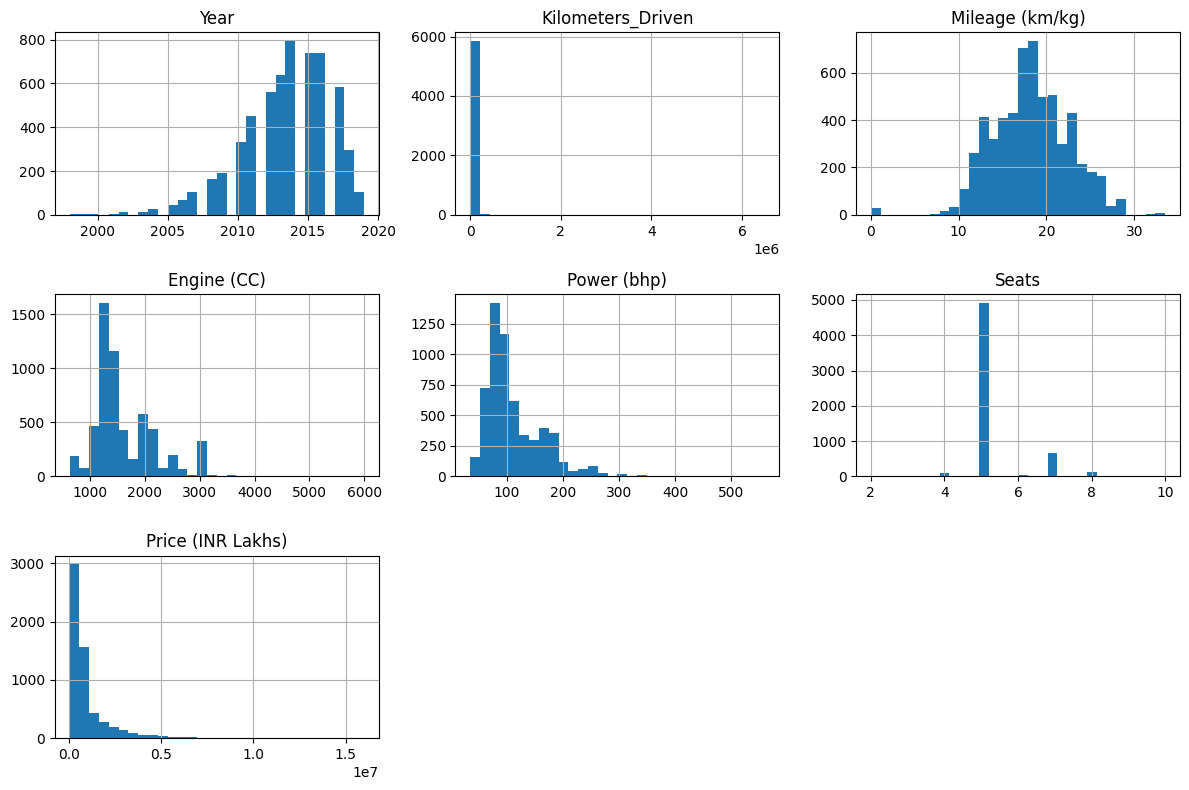

In [78]:
num_cols = ['Year','Kilometers_Driven','Mileage (km/kg)','Engine (CC)','Power (bhp)','Seats','Price (INR Lakhs)']
df_cleaned[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

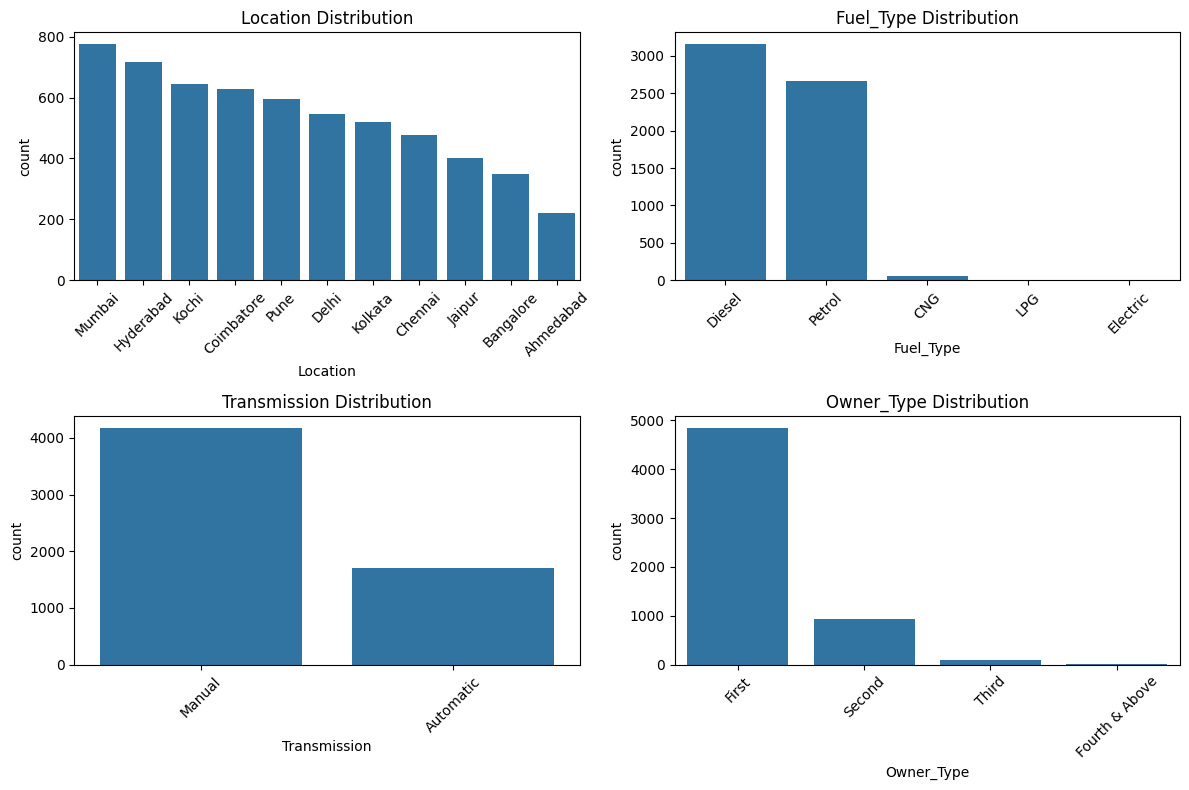

In [79]:
cat_cols = ['Location', 'Fuel_Type','Transmission','Owner_Type'] # Note brand model was excluded as it contained too many categories
fig, axes = plt.subplots(2,2, figsize=(12,8))
for col, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=df_cleaned, x=col, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f'{col} Distribution')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Step 8 - EDA (Bivariate Analysis)
Looking at the Univariate Analysis results, we can that there are some trends for each of the variables. Now let's look at Bivariate Analysis to see the relationships between the different independent variables and the target variable (Price (INR Lakhs)). 

"Bivariate analysis is a statistical method used to explore the relationship between two variables. The goal is to understand whether and how the two variables are related — and if they are, then describe the nature, strength, and direction of that relationship." (GeeksforGeeks, 2025b)

https://www.geeksforgeeks.org/maths/bivariate-analysis/

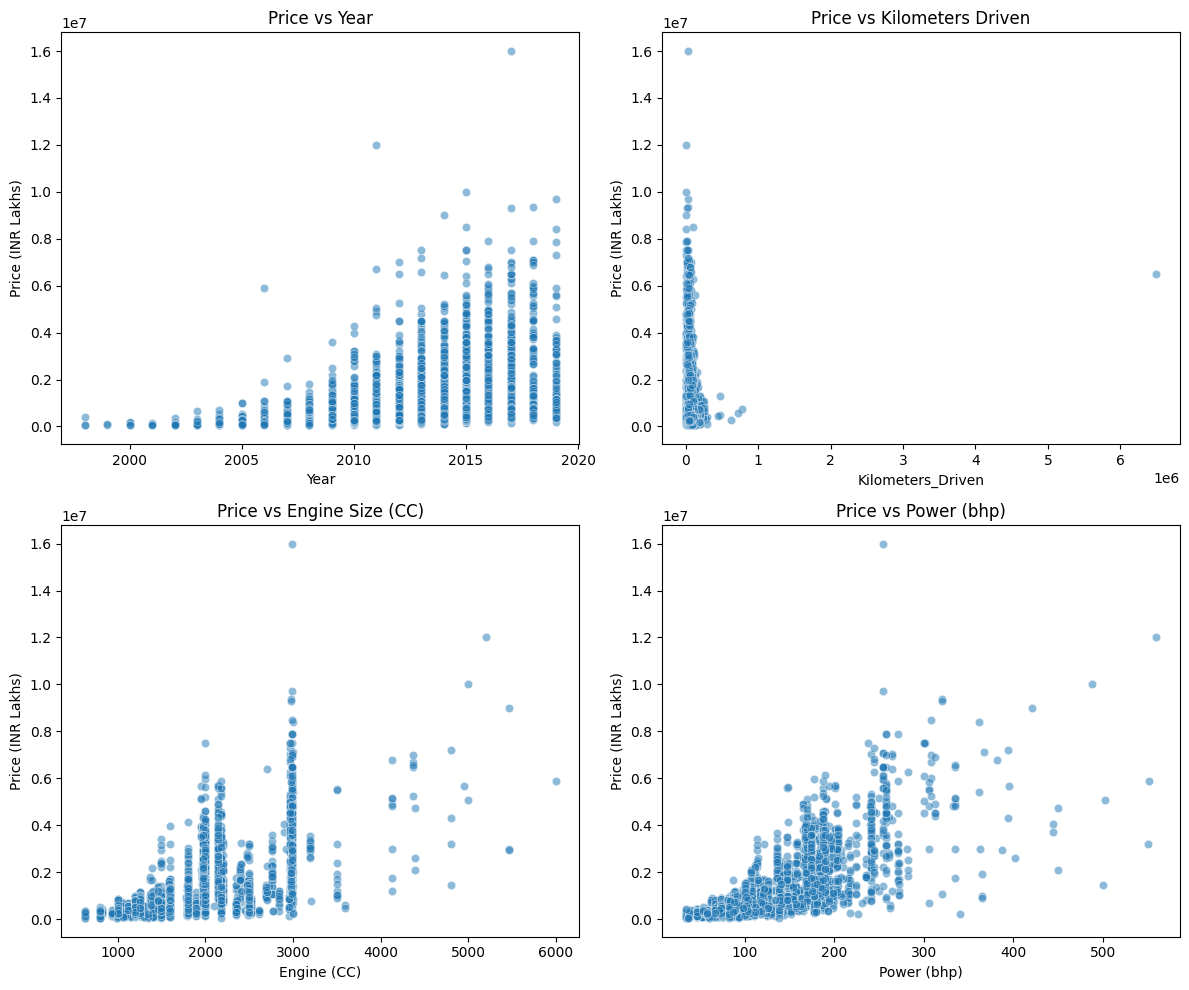

In [80]:
# Scatter Plot
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# Price vs Year
sns.scatterplot(x='Year', y='Price (INR Lakhs)', data=df_cleaned, alpha=0.5, ax=axes[0,0])
axes[0,0].set_title('Price vs Year')

# Price vs Kilometers
sns.scatterplot(x='Kilometers_Driven', y='Price (INR Lakhs)', data=df_cleaned, alpha=0.5, ax=axes[0,1])
axes[0,1].set_title('Price vs Kilometers Driven')

# Price vs Engine Size
sns.scatterplot(x='Engine (CC)', y='Price (INR Lakhs)', data=df_cleaned, alpha=0.5, ax=axes[1,0])
axes[1,0].set_title('Price vs Engine Size (CC)')

# Price vs Power
sns.scatterplot(x='Power (bhp)', y='Price (INR Lakhs)', data=df_cleaned, alpha=0.5, ax=axes[1,1])
axes[1,1].set_title('Price vs Power (bhp)')

plt.tight_layout()
plt.show()

## Key Insights:
- Year (Age), Engine Size, and Power are all important predictors of price as they show a linear positive correlation with Price.
- Kilometers_Drive seems to have a very large outlier in the dataset, this will have to be acknowledged during data preparation for model training in Task 2.

These findings should be carried into Task 2 (PyCaret) where they’ll help select features for model training.

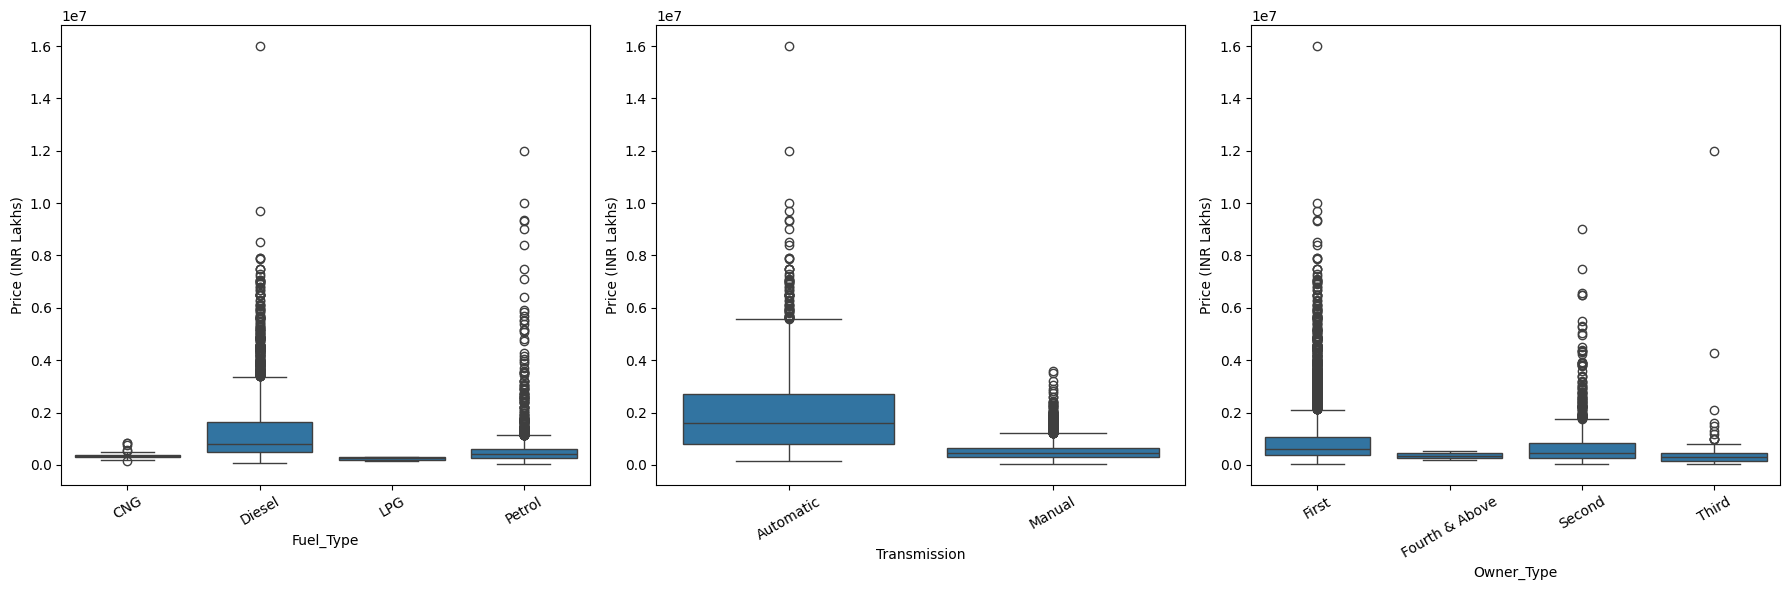

In [81]:
# Boxplots by category
fig, axes = plt.subplots(1,3, figsize=(18,6))
sns.boxplot(x='Fuel_Type', y='Price (INR Lakhs)', data=df_cleaned, ax=axes[0])
sns.boxplot(x='Transmission', y='Price (INR Lakhs)', data=df_cleaned, ax=axes[1])
sns.boxplot(x='Owner_Type', y='Price (INR Lakhs)', data=df_cleaned, ax=axes[2])
for ax in axes:
    ax.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

The boxplots reveal significant outliers in the dataset. It highlights how luxury vehicles have much higher resale values compared to the median car. While they are valid data points, they can heavily skew the price distribution.

In Task 2 (PyCaret pipeline and ML), these outliers may affect model performance and could require transformation (e.g., log-scaling) or capping. 

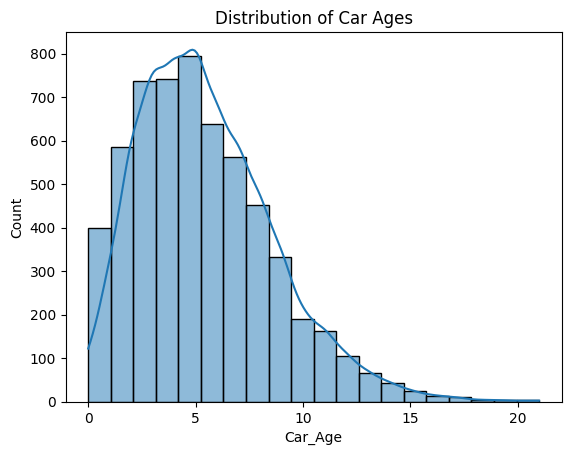

In [82]:
df_cleaned['Car_Age'] = df_cleaned['Year'].max() - df_cleaned['Year']
sns.histplot(df_cleaned['Car_Age'], bins=20, kde=True)
plt.title('Distribution of Car Ages')
plt.show()

# Step 9 - Correlation Heatmap

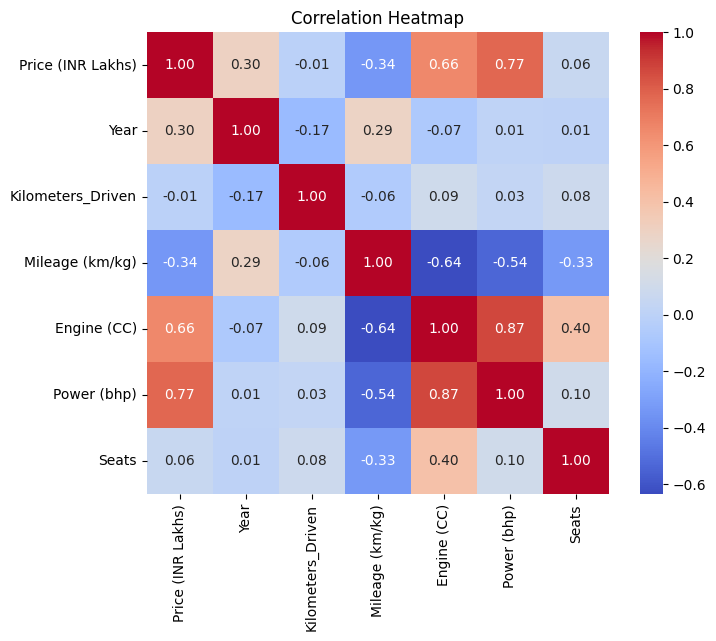

In [83]:
cols = ['Price (INR Lakhs)', 'Year','Kilometers_Driven',
        'Mileage (km/kg)','Engine (CC)','Power (bhp)','Seats']

corr = df_cleaned[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",
            cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

## Key Insigts (Correlation Matrix)
- Main predictors of price: **Power (bhp), Engine (CC), Year.**
- **Mileage and Seats** are **weak predictors** of resale price for vehicles.
- **Kilometers Driven doesn’t show a clear linear relationship**, likely due to the outlier mentioned earlier.
- Collinearity issue: **Power and Engine** are redundant—later in Task 2 (PyCaret pipeline), I will **consider feature selection or dimensionality reduction** later on in Task 2 to ensure only the most important features are kept.

# Step 10 - Conclusion

## Key Insights (Conclusion)
### For cleaning:
- Kilometers_Driven is a poorly correlated feature because it has an outlier of 6500000km, while the Q1 and Q3 are only between 34000km and 730000km respectively (Taken from the df_cleaned.describe().T)
- Fuel_Type, Transmission, and Owner_Type contain several outliers that may affect the skewness of the price distribution. May need to perform some sort of cleaning or outlier removal later on.


### For feature selection
- Power and Engine are highly correlated independent variables and may cause multicollinearity issues. Feature selection or dimensionality reduction will potentially need to be performed in Task 2 to retain only the most important feature variable amongst the two.
- Brand_Model has too many unique categories, hence I may not even be able to convert it into a numerical encoding using one-hot encoding. As a result, due to the large number of unique categories, this column may need to be removed for the sake of minimizing model overfit.

### Trends 
- Car prices decline with age (Year decrease → Price decrease). This is known as depreciation and is a common trend often seen in Non-Current Assets (NCA) such as vehicles.
- Higher engine power generally corresponds to higher prices.
- Automatic cars appear more expensive than manual.
- Diesel cars may retain more resale value than Petrol/CNG.
- Majority of cars are 5-seaters, but SUVs with 7 seats show higher resale price.
- Outliers exist (luxury brands like Audi/BMW far above the median).

# Step 11 - Export 

In [87]:
# Save the semi cleaned dataset for Task 2 (Perform more cleaning and transformation there for Modelling)
df_cleaned.to_csv("Used_Car_Prices_Task2.csv", index=False)